<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2023<br>
<font color=3C99D size=5>
    Practical Assignment 4 - Bayesian Networks <br>
<font color=696880 size=4>
    Mahdi Jafari - Sina Elahimanesh

____

STD number: 400104964

Name: Aylin Rasteh


**لطفا پس از اتمام تمرین، ژوپیتر را ری‌استارت نمایید و تمامی سلول‌ها را مجددا اجرا کنید که به ترتیب سلول‌ها اجرا شده باشند و خروجی قابل نمایش باشد.**

# سیاست نمره‌دهی تمرین

<div dir="rtl">
در این تمرین تست‌ها و میزان پاس شدن تست‌ها نمره‌ی شما را تعیین می‌کنند. به این ترتیب تعداد تست‌های پاس شده ملاک نمره‌دهی خواهد بود.
</div>


# توجه
<div dir="rtl">
لطفا به ۵ سلول زیر دست نزنید و این سلول‌ها را صرفا در ابتدای اجرای کد خود، اجرا نمایید.
به این ترتیب این سلول‌ها نیازمندی‌های لازم را نصب می‌نمایند و همچنین مواردی که در کدهایتان لازم هستند را ایمپورت میکنند. به علاوه توابع و پیش‌نیازهای لازم برای این سوال را ایجاد می‌نمایند.
</div>
<div dir="rtl">
بدون دست زدن به قسمت‌های زیر آنها را اجرا کنید.
</div>

In [1]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time
import pygame
import os, sys

pygame 2.3.0 (SDL 2.24.2, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
os.environ["SDL_VIDEODRIVER"] = "dummy"
pygame.display.init()
pygame.display.set_mode((1, 1), pygame.NOFRAME)
pygame.font.init()

In [3]:
!pip install gdown
!gdown 1qX5euDVHAg4PDo9TnyUuBp9o2IK9Hjod
!unzip -o src.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1qX5euDVHAg4PDo9TnyUuBp9o2IK9Hjod
To: /content/src.zip
100% 850k/850k [00:00<00:00, 141MB/s]
Archive:  src.zip
   creating: display_resources/
  inflating: display_resources/ice-cream-truck.png  
  inflating: display_resources/finn.png  
  inflating: display_resources/jake.png  
  inflating: display_resources/ice-king.png  
  inflating: display_resources/princess-bubblegum.png  
   creating: tests/
  inflating: tests/q6.py             
  inflating: tests/q3.py             
  inflating: tests/q4.py             
  inflating: tests/q1.py             
  inflating: tests/utils.py          
  inflating: tests/__init__.py       
  inflating: tests/q2.py             
  inflating: tests/q5.py             
  inflating: tests/game_utils.py     
  inflating: tests/q7.py             
  inflating: tests/q8.py             
  inflating: tests/q9.py     

In [4]:
import automobile
import bayes_net as bn
import functools
from copy import deepcopy

from game import GameState, AgentState
from typing import List, Dict, Optional

from inference import DiscreteDistribution
from util import manhattan_distance
from automobile import Agent
from distance_calculator import Distancer
from game import Actions

In [5]:
def draw(state: GameState, agents):
    from display import draw as d
    view = d(state, agents)
    img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
    output.clear(wait=True)
    cv2_imshow(img_bgr)
    import time
    time.sleep(0.1)

import tests.game_utils
tests.game_utils.draw_function = draw

# **ماشین بستنی فروشی خودران**


<div dir="rtl">
در شهر اووو، هیچ یخچالی وجود ندارد. از آنجایی که به فصل گرم وارد شده‌ایم، شما یک ماشین بستنی فروشی خریده‌اید و به این شهر اپلای کرده‌اید. اما تعطیلات به پایان رسیده‌اند و شما باید به دانشگاه برگردید. در نتیجه تصمیم می‌گیرید ماشین بستنی‌ فروشی خود را، خودران کنید.
<br>
شهر اووو به شکل یک جدول $n$ در $m$
و شما در لحظه اول در مختصات $(x, y)$ قرار دارید.
مردم شهر اووو حوصله راه رفتن ندارند و تنها در صورتی از شما بستنی می‌خرند که با شما در یک خانه از جدول شهر اووو باشند. قابل ذکر است که آنها تنها اشتهای یک بستنی در روز دارند.
<br>
هر کدام از مردم شهر در هر ثانیه فریاد می‌زنند و در نتیجه شما متوجه می‌شوید که <a href="https://fa.wikipedia.org/wiki/%D9%81%D8%A7%D8%B5%D9%84%D9%87_%D9%85%D9%86%D9%87%D8%AA%D9%86"> فاصله منهتنی</a>
هرکدام از آنها با شما چقدر است. البته این معیار بخاطر آلودگی صوتی شهر اووو، ممکن است خطا داشته باشد.
<br>
فضای مسئله یک روز از شهر اووو است و به علت جادویی بودن شهر اووو، تا زمانی که همه بستنی نخورند، روز به پایان نمی‌رسد.
<br>
در این تمرین، مسئله را با استفاده از شبکه‌های بیزین مدل خواهیم کرد و تلاش می‌کنیم ماشین خودرانی طراحی کنیم که به مردم شهر بستنی بفروشد. البته هدف اصلی در این تمرین این است که با استفاده از شبکه‌های بیزین، حدس خوبی برای موقعیت هر کدام از مردم شهر داشته باشیم تا بتوانیم به سمت آنها حرکت کنیم.
</div>

![Finn and Jake](https://bigcartoon.org/images/thumb/7/78/Vlcsnap-2014-01-31-01h31m13s122.png/640px-Vlcsnap-2014-01-31-01h31m13s122.png?download)

<div dir="rtl">
<h3>تعاریف</h3>
<br>
- بیز نت: یک نمایش از مدل احتمالاتی، به شکل یک گراف جهت‌دار بدون دور که رئوس آن متغیرهای تصادفی مسئله هستند. همچنین در کنار این گراف، به ازای هر متغیر یک جدول از احتمالات شرطی نیز وجود دارد.
<br>
- فکتور: یک جدول از احتمالات که لزوما جمع آنها یک نیست. در حالت کلی یک فکتور به شکل
$f(X_1, \ldots, X_m, y_1, \ldots, y_n | Z_1,\ldots,Z_r,w_1,\ldots,w_q)$
است. به خاطر داشته باشید که متغیرهای با اسم کوچک مقدار دارند. یک فکتور به ازای هر مقداردهی به 
$X_i$ و $Z_k$
یک مقدار دارد. به متغیرهای
$X_i$ و $y_j$
متغیرهای شرط نشده (unconditioned)
و به بقیه متغیرهای شرط‌شده (conditioned)
می‌گوییم.
</div>

# **بخش اول: ساختار بیز نت**

<div dir="rtl">
در گام اول تصور می‌کنیم شهر اووو تنها دو شهروند دارد (فین و جیک). مد‌ل‌شده این شرایط از مسئله با بیز نت، به شکل زیر خواهد بود:
</div>

![First bayes net](https://i.yourimageshare.com/pucVGqdyda.webp)

<div dir="rtl">
در این شبکه بیزین، منظور از CAR و FINN و JAKE به ترتیب موقعیت ماشین بستنی‌فروشی، موقعیت فین و موقعیت جیک است. موقعیت یک جسم به شکل یک جفت (tuple در پایتون) $(x, y)$ نشان داده می‌شود که همواره داخل فضای شهر اووو قرار دارد. در شهر اووو
$0 \le x < width$ و
$0 \le y < height$.
<br>
همچنین OBS0 و OBS1 نشان‌دهنده فاصله نویزی به ترتیب فین و جیک هستند. این متغیرها همواره نامنفی هستند و حداکثر ۷ تا با مقدار واقعی فاصله، تفاوت دارند.
<br>
همچنین در این صورت از مسئله، همانطور که در شکل پیداست، موقعیت فین و جیک روی هم تاثیرگذار هستند (چون از طریق بیمو (BMO) با یکدیگر در ارتباطند).
</div>

![BMO](https://i.yourimageshare.com/WGqbuTQtKc.webp)


<div dir="rtl">
تابع
<code>construct_bayes_net</code>
را در cell زیر پیاده کنید تا بیز نت گفته‌شده را بسازد. به داکیومنت ابتدای این تابع (و بقیه توابع این نوت‌بوک) توجه کنید.
</div>

In [6]:
def construct_bayes_net(game_state: GameState) -> bn.BayesNet:
    """
    Construct an empty Bayes net according to the structure given.

    You *must* name all variables using the constants in this function.

    In this method, you should:
    - populate `variables` with the Bayes Net nodes
    - populate `edges` with every edge in the Bayes Net. we will represent each
      edge as a tuple `(from, to)`.
    - set each `variable_domains_dict[var] = values`, where `values` is a list
      of the possible assignments to `var`.
        - each agent position is a tuple (x, y) where x and y are 0-indexed
        - each observed distance is a noisy Manhattan distance:
          it's non-negative and |obs - true| <= MAX_NOISE
    - this uses slightly simplified mechanics vs the ones used later for simplicity
    """
    # constants to use
    CAR = "Car"
    FINN = "Finn"
    JAKE = "Jake"
    OBS0 = "Observation0"
    OBS1 = "Observation1"
    X_RANGE = game_state.get_walls().width
    Y_RANGE = game_state.get_walls().height
    MAX_NOISE = 7

    variables = []
    edges = []
    variable_domains_dict = {}

    # *** YOUR CODE HERE ***
    variables.append(CAR)
    variables.append(FINN)
    variables.append(JAKE)
    variables.append(OBS0)
    variables.append(OBS1)
    
    edges.append((FINN, JAKE))
    edges.append((JAKE, OBS1))
    edges.append((CAR, OBS1))
    edges.append((CAR, OBS0))
    edges.append((FINN, OBS0))

    domain_loc = []
    domain_dist = []

    for i in range(X_RANGE):
      for j in range(Y_RANGE):
        domain_loc.append((i, j))

    for i in range(MAX_NOISE + X_RANGE + Y_RANGE - 1):
      domain_dist.append(i)
    
    variable_domains_dict[CAR] = domain_loc
    variable_domains_dict[FINN] = domain_loc
    variable_domains_dict[JAKE] = domain_loc
    variable_domains_dict[OBS0] = domain_dist
    variable_domains_dict[OBS1] = domain_dist

    # *** END YOUR CODE HERE ***

    net = bn.construct_empty_bayes_net(variables, edges, variable_domains_dict)
    return net

# تست‌های بخش اول

In [7]:
from tests import q1

q1.test_1(construct_bayes_net)
q1.test_2(construct_bayes_net)

test_1: Passed!
--------------------------------------------------------------------------------
test_2: Passed!
--------------------------------------------------------------------------------


# **بخش دوم: جوین کردن فاکتورهای داده شده**

<div dir="rtl">
در این بخش قصد داریم تابع
<code>join_factors</code>
 را پیاده‌سازی کنیم. این تابع یک لیست از فکتورها ورودی می‌گیرد و باید یک فکتور در خروجی بدهد که حاصل جوین کردن تمام ورودی‌ها باشد. مورد انتظار است این تابع موارد زیر را اجرا کند (راهنمایی: همانطور که در کد پیداست، ابتدا سعی کنید بفهمید کدام متغیرها در حاصل، شرط‌شده و کدام شرط‌نشده هستند).
</div>

- `join_factors`$(P(X|Y), P(Y)) = P(X)$
- `join_factors`$(P(V,W | X,Y,Z), P(X,Y | Z)) = P(V,W,X,Y | Z)$
- `join_factors`$(P(X|Y,Z), P(Y)) = P(X,Y|Z)$
- `join_factors`$(P(V|W), P(X|Y), P(Z)) = P(V, X, Z | W,Y)$

In [123]:
def join_factors(factors: List[bn.Factor]) -> bn.Factor:
    """
    Input factors is a list of factors.

    You should calculate the set of unconditioned variables and conditioned
    variables for the join of those factors.

    Return a new factor that has those variables and whose probability entries
    are product of the corresponding rows of the input factors.

    You may assume that the variable_domains_dict for all the input
    factors are the same, since they come from the same BayesNet.

    joinFactors will only allow unconditioned_variables to appear in
    one input factor (so their join is well defined).

    Hint: Factor methods that take an assignmentDict as input
    (such as get_probability and set_probability) can handle
    assignmentDicts that assign more variables than are in that factor.

    Useful functions:
    Factor.get_all_possible_assignment_dicts
    Factor.get_probability
    Factor.set_probability
    Factor.unconditioned_variables
    Factor.conditioned_variables
    Factor.variable_domains_dict
    """

    factors = list(factors)

    # Ignore this part
    sets_of_unconditioned = [set(factor.unconditioned_variables()) for factor in factors]
    if len(factors) > 1:
        intersect = functools.reduce(lambda x, y: x & y, sets_of_unconditioned)
        if len(intersect) > 0:
            print("Factor failed joinFactors typecheck: ", factors)
            raise ValueError(
                "unconditioned_variables can only appear in one factor. \n"
                + "unconditioned_variables: " + str(intersect) +
                "\nappear in more than one input factor.\n" +
                "Input factors: \n" +
                "\n".join(map(str, factors))
            )

    # Find out which variables are unconditioned and conditioned in the final joined factor

    # *** YOUR CODE HERE ***

    final_unconditioned_variables = set()
    final_conditioned_variables = set()
    for factor in factors:
      final_conditioned_variables.update(factor.conditioned_variables())
      final_unconditioned_variables.update(factor.unconditioned_variables())
    final_conditioned_variables = final_conditioned_variables - final_unconditioned_variables
    
    # *** END YOUR CODE HERE ***

    joined_factor = bn.Factor(
        final_unconditioned_variables,
        final_conditioned_variables,
        factors[0].variable_domains_dict()
    )

    # Use Factor.set_probability and find probabilities for each assignment of variables
    # Hint: use Factor.get_all_possible_assignment_dicts

    # *** YOUR CODE HERE ***
    for possible_assignment in joined_factor.get_all_possible_assignment_dicts():
      p = 1
      for factor in factors:
        p *= factor.get_probability(possible_assignment)
      joined_factor.set_probability(possible_assignment, p)
    # *** END YOUR CODE HERE ***

    return joined_factor

# تست‌های بخش دوم

In [124]:
from tests import q2

q2.test_product_rule(join_factors)
q2.test_product_rule_extended(join_factors)
q2.test_disjoint_right(join_factors)
q2.test_common_right(join_factors)
q2.test_grade_join(join_factors)
q2.test_product_rule_nonsingleton_var(join_factors)

test_product_rule: Passed!
--------------------------------------------------------------------------------
test_product_rule_extended: Passed!
--------------------------------------------------------------------------------
test_disjoint_right: Passed!
--------------------------------------------------------------------------------
test_common_right: Passed!
--------------------------------------------------------------------------------
test_grade_join: Passed!
--------------------------------------------------------------------------------
test_product_rule_nonsingleton_var: Passed!
--------------------------------------------------------------------------------


# **بخش سوم: Eliminate**

<div dir="rtl">
در این بخش قصد داریم تابع eliminate را پیاده‌سازی کنیم که یک فکتور و یک متغیر ورودی می‌گیرد و آن متغیر را از فکتور حذف می‌کند. این کار با جمع زدن سطرهایی که تنها در مقدار متغیر حذفی با یکدیگر تفاوت دارند، انجام می‌شود.
</div>

In [10]:
def eliminate(factor: bn.Factor, elimination_variable: str) -> bn.Factor:
    """
    Input factor is a single factor.
    Input elimination_variable is the variable to eliminate from factor.
    elimination_variable must be an unconditioned variable in factor.

    You should calculate the set of unconditioned variables and conditioned
    variables for the factor obtained by eliminating the variable
    elimination_variable.

    Return a new factor where all of the rows mentioning
    elimination_variable are summed with rows that match
    assignments on the other variables.

    Useful functions:
    Factor.get_all_possible_assignment_dicts
    Factor.get_probability
    Factor.set_probability
    Factor.unconditioned_variables
    Factor.conditioned_variables
    Factor.variable_domains_dict
    """

    # Ignore this part
    if elimination_variable not in factor.unconditioned_variables():
        print("Factor failed eliminate typecheck: ", factor)
        raise ValueError(
            "Elimination variable is not an unconditioned variable " \
            + "in this factor\n" +
            "elimination_variable: " + str(elimination_variable) + \
            "\nunconditioned_variables:" + str(factor.unconditioned_variables())
        )

    if len(factor.unconditioned_variables()) == 1:
        print("Factor failed eliminate typecheck: ", factor)
        raise ValueError(
            "Factor has only one unconditioned variable, so you " \
            + "can't eliminate \nthat variable.\n" + \
            "elimination_variable:" + str(elimination_variable) + "\n" + \
            "unconditioned_variables: " + str(factor.unconditioned_variables())
        )

    # *** YOUR CODE HERE ***"
    final_unconditioned_variables = factor.unconditioned_variables()
    final_conditioned_variables = factor.conditioned_variables()
    final_unconditioned_variables.remove(elimination_variable)
    
    eliminated_factor = bn.Factor(
        final_unconditioned_variables,
        final_conditioned_variables,
        factor.variable_domains_dict()
    )

    for possible_assignment in eliminated_factor.get_all_possible_assignment_dicts():
      p = 0
      possible_assignment_copy = possible_assignment
      for value in factor.variable_domains_dict()[elimination_variable]:
        possible_assignment_copy[elimination_variable] = value
        p += factor.get_probability(possible_assignment_copy)
      eliminated_factor.set_probability(possible_assignment, p)

    return eliminated_factor
    # *** END YOUR CODE HERE ***"

# تست‌های بخش سوم

In [11]:
from tests import q3

q3.test_simple_eliminate(eliminate)
q3.test_simple_eliminate_extended(eliminate)
q3.test_eliminate_conditioned(eliminate)
q3.test_grade_eliminate(eliminate)
q3.test_simple_eliminate_nonsingleton_var(eliminate)
q3.test_simple_eliminate_int(eliminate)

test_simple_eliminate: Passed!
--------------------------------------------------------------------------------
test_simple_eliminate_extended: Passed!
--------------------------------------------------------------------------------
test_eliminate_conditioned: Passed!
--------------------------------------------------------------------------------
test_grade_eliminate: Passed!
--------------------------------------------------------------------------------
test_simple_eliminate_nonsingleton_var: Passed!
--------------------------------------------------------------------------------
test_simple_eliminate_int: Passed!
--------------------------------------------------------------------------------


# **بخش چهارم: Enumeration**

<div dir="rtl">
در این بخش با استفاده از enumeration،
تابعی پیاده‌سازی می‌کنیم که یک بیز نت، کوئری، و اویدنت ورودی می‌گیرد و در آن پاسخ سوال زیر را می‌دهد.
</div>

$P(Q_1,Q_2,\ldots,Q_k | e_1,e_2,\ldots,e_m)$

<div dir="rtl">
یادآوری: الگوریتم
enumeration
به این صورت کار می‌کند که ابتدا با تمام متغیرها جوین میزند و سپس تمام 
hidden variableها
را حذف می‌کند.
<br>
راهنمایی: در کدتان از تابع زیر استفاده کنید که روی یک متغیر جوین می‌زند.
</div>

In [12]:
def join_factors_by_variable(factors: List[bn.Factor], join_variable: str):
    """
    Input factors is a list of factors.
    Input joinVariable is the variable to join on.

    This function performs a check that the variable that is being joined on
    appears as an unconditioned variable in only one of the input factors.

    Then, it calls your joinFactors on all of the factors in factors that
    contain that variable.

    Returns a tuple of
    (factors not joined, resulting factor from joinFactors)
    """

    factors_to_join = [factor for factor in factors if join_variable in factor.variables_set()]
    factors_not_to_join = [factor for factor in factors if join_variable not in factor.variables_set()]

    # Ignore this part
    num_variables_on_left = len(
        [factor for factor in factors_to_join if join_variable in factor.unconditioned_variables()]
    )
    if num_variables_on_left > 1:
        print("Factor failed joinFactorsByVariable typecheck: ", factors)
        raise ValueError(
            "The joinBy variable can only appear in one factor as an \nunconditioned variable. \n" +
            "join_variable: " + str(join_variable) + "\n" +
            ", ".join(map(str, [factor.unconditioned_variables() for factor in factors_to_join]))
        )

    joined_factor = join_factors(factors_to_join)
    return factors_not_to_join, joined_factor

In [13]:
def inference_by_enumeration(bayes_net: bn.BayesNet, query_variables: List[str], evidence_dict: Dict):
    """
    An inference by enumeration implementation provided as reference.
    This function performs a probabilistic inference query that
    returns the factor:

    P(query_variables | evidence_dict)

    bayes_net:       The Bayes Net on which we are making a query.
    query_variables: A list of the variables which are unconditioned in
                    the inference query.
    evidence_dict:   An assignment dict {variable : value} for the
                    variables which are presented as evidence
                    (conditioned) in the inference query. 
    """

    # initialize return variables and the variables to eliminate
    evidence_variables_set = set(evidence_dict.keys())
    query_variables_set = set(query_variables)
    elimination_variables = (bayes_net.variables_set() - evidence_variables_set) - query_variables_set

    # grab all factors where we know the evidence variables (to reduce the size of the tables)
    current_factors_list = bayes_net.get_all_cpts_with_evidence(evidence_dict)

    # join all factors by variables
    # *** YOUR CODE HERE ***

    # factors_copy = current_factors_list
    for variable in elimination_variables:
      current_factors_list, joined_factor =  join_factors_by_variable(current_factors_list, variable)
      current_factors_list += [joined_factor]

    # *** END YOUR CODE HERE ***

    # current_factors_list should contain the connected components of the graph now as factors, must join the connected components
    full_join = join_factors(current_factors_list)

    # marginalize all variables that aren't query or evidence
    incrementally_marginalized_joint = full_join
    # *** YOUR CODE HERE ***

    for variable in elimination_variables:
        incrementally_marginalized_joint = eliminate(incrementally_marginalized_joint, variable)
    
    # *** END YOUR CODE HERE ***

    full_joint_over_query_and_evidence = incrementally_marginalized_joint

    # normalize so that the probability sums to one
    # the input factor contains only the query variables and the evidence variables, 
    # both as unconditioned variables
    query_conditioned_on_evidence = bn.normalize(full_joint_over_query_and_evidence)
    # now the factor is conditioned on the evidence variables

    return query_conditioned_on_evidence

# تست‌های بخش چهارم

In [14]:
from tests import q4

q4.test_disconnected_eliminate(inference_by_enumeration)
q4.test_independent_eliminate(inference_by_enumeration)
q4.test_independent_eliminate_extended(inference_by_enumeration)
q4.test_common_effect_eliminate(inference_by_enumeration)
q4.test_grade_var_elim(inference_by_enumeration)
q4.test_large_bayes_net_elim(inference_by_enumeration)

test_disconnected_eliminate: Passed!
--------------------------------------------------------------------------------
test_independent_eliminate: Passed!
--------------------------------------------------------------------------------
test_independent_eliminate_extended: Passed!
--------------------------------------------------------------------------------
test_common_effect_eliminate: Passed!
--------------------------------------------------------------------------------
test_grade_var_elim: Passed!
--------------------------------------------------------------------------------
test_large_bayes_net_elim: Passed!
--------------------------------------------------------------------------------


# **بخش پنجم: Variable Elimination**

<div dir="rtl">
در این بخش نیز همان سوال بخش قبل در تابع پرسیده می‌شود اما باید الگوریتم variable elimination استفاده شود.
</div>

In [30]:
def inference_by_variable_elimination(bayes_net: bn.BayesNet, query_variables: List[str], evidence_dict: Dict, elimination_order: List[str]):
    """
    This function should perform a probabilistic inference query that
    returns the factor:

    P(query_variables | evidence_dict)

    It should perform inference by interleaving joining on a variable
    and eliminating that variable, in the order of variables according
    to elimination_order.

    You need to use joinFactorsByVariable to join all of the factors
    that contain a variable in order for the autograder to
    recognize that you performed the correct interleaving of
    joins and eliminates.

    If a factor that you are about to eliminate a variable from has
    only one unconditioned variable, you should not eliminate it
    and instead just discard the factor.  This is since the
    result of the eliminate would be 1 (you marginalize
    all of the unconditioned variables), but it is not a
    valid factor.  So this simplifies using the result of eliminate.

    The sum of the probabilities should sum to one (so that it is a true
    conditional probability, conditioned on the evidence).

    bayes_net:         The Bayes Net on which we are making a query.
    query_variables:   A list of the variables which are unconditioned
                      in the inference query.
    evidence_dict:     An assignment dict {variable : value} for the
                      variables which are presented as evidence
                      (conditioned) in the inference query.
    elimination_order: The order to eliminate the variables in.

    Hint: BayesNet.get_all_cpts_with_evidence will return all the Conditional
    Probability Tables even if an empty dict (or None) is passed in for
    evidence_dict. In this case it will not specialize any variable domains
    in the CPTs.

    Useful functions:
    BayesNet.get_all_cpts_with_evidence
    normalize
    eliminate
    join_factors_by_variable
    join_factors
    """

    if elimination_order is None:  # set an arbitrary elimination order if None given
        elimination_variables = bayes_net.variables_set() - set(query_variables) - set(evidence_dict.keys())
        elimination_order = sorted(list(elimination_variables))

    # *** YOUR CODE HERE ***
    current_factors_list = bayes_net.get_all_cpts_with_evidence(evidence_dict)

    marginalized_joint = current_factors_list

    for variable in elimination_order:
      current_factors_list, joined_factor =  join_factors_by_variable(current_factors_list, variable)
      if not(len(joined_factor.unconditioned_variables()) == 1 and variable in joined_factor.unconditioned_variables()):
        marginalized_joint = eliminate(joined_factor, variable)
        current_factors_list += [marginalized_joint]

    full_joint_over_query_and_evidence = join_factors(current_factors_list)
    query_conditioned_on_evidence = bn.normalize(full_joint_over_query_and_evidence)

    return query_conditioned_on_evidence
    # *** END YOUR CODE HERE ***

# تست‌های بخش پنجم

In [31]:
from tests import q5

q5.test_disconnected_eliminate(inference_by_variable_elimination)
q5.test_independent_eliminate(inference_by_variable_elimination)
q5.test_independent_eliminate_extended(inference_by_variable_elimination)
q5.test_common_effect_eliminate(inference_by_variable_elimination)
q5.test_grade_var_elim(inference_by_variable_elimination)
q5.test_large_bayes_net_elim(inference_by_variable_elimination)

test_disconnected_eliminate: Passed!
--------------------------------------------------------------------------------
test_independent_eliminate: Passed!
--------------------------------------------------------------------------------
test_independent_eliminate_extended: Passed!
--------------------------------------------------------------------------------
test_common_effect_eliminate: Passed!
--------------------------------------------------------------------------------
test_grade_var_elim: Passed!
--------------------------------------------------------------------------------
test_large_bayes_net_elim: Passed!
--------------------------------------------------------------------------------


# **بخش ششم: Observation Probability**


<div dir="rtl">
از این بخش به بعد، قصد داریم احتمال وجود هر شخص در هر خانه از جدول را به دست آوریم. در بخش‌های آتی، فرض می‌کنیم اشخاص روی موقعیت مکانی یکدیگر تاثیر ندارند (BMO خراب شده است).
<br>
همچنین در شهر اووو، دیوارهایی وجود دارد که از این بخش به بعد در نظر خواهیم گرفت. هر دیوار یک خانه از جدول را مسدود می‌کند.
</div>

![BMO Broken](https://i.yourimageshare.com/oMIX4GiIDj.webp)


<div dir="rtl">
در این بخش شما متود
<code>get_observation_prob</code>
از کلاس
<code>InferenceModule</code>
پیاده می‌کنید. این کلاس یک پایه برای بخش‌های بعدی خواهد بود. در این تابع شما باید یک مشاهده (فاصله نویزدار ماشین و یک شخص)، موقعیت ایجنت و موقعیت آن شخص را ورودی بگیرید و احتمال اینکه این مشاهده در چنین موقعیتی از ماشین و شخص انجام شود را خروجی بدهید. در واقع خروجی این تابع به شکل
$$P(noisyDistance | carPosition,personPosition)$$
باید باشد.
<br>
با توجه به فاصله واقعی ماشین تا روح، سنسور فاصله دارای توزیع احتمالی بر روی خروجی‌اش دارد. تابع
<code>automobile.get_observation_probability(noisyDistance, trueDistance)</code>
  نشان‌دهنده
$$P(noisyDistance | trueDistance)$$
می‌باشد که شما باید در پیاده‌سازی خود از آن استفاده کنید. همچنین می‌توانید از تابع کمکی
<code>manhattan_distance</code>
استفاده کنید تا فاصله دو نقطه را پیدا کنید.
<br>
همچنین یک حالت خاص نیز وجود دارد. اهالی شهر اووو پس از خوردن بستنی، به خانه فین و جیک می‌روند و دیگر در نقشه نیستند. شما باید این حالت را نیز در تابع هندل کنید. در این حالت، سنسورهای ماشین به شکل قطعی،
<code>None</code>
نشان می‌دهند. در این حالت، اگر موقعیت شخص موقعیت خانه فین و جیک باشد، احتمال باید 1 برگردانده شود و در غیر این‌صورت 0. مطمئن شوید که این حالت خاص را در تابع هندل می‌کنید.
</div>

In [36]:
class InferenceModule:
    """
    An inference module tracks a belief distribution over a person's location.
    """

    def __init__(self, person_agent):
        """
        set the person agent for later access.
        """
        self.person_agent = person_agent
        self.index = person_agent.index
        self.obs = []  # most recent observation position

    def get_home_position(self):
        return 2 * self.index - 1, 1

    def get_position_distribution_helper(self, game_state, pos, index, agent):
        try:
            home = self.get_home_position()
            game_state = self.set_person_position(game_state, pos, index)
        except TypeError:
            home = self.get_home_position(index)
            game_state = self.set_person_positions(game_state, pos)
        car_position = game_state.get_car_position()
        person_position = game_state.get_person_position(index)  # the position you set
        dist = DiscreteDistribution()
        if car_position == person_position:  # the person has been caught!
            dist[home] = 1.0
            return dist
        car_successor_states = automobile.Actions.get_legal_neighbors(
            car_position,
            game_state.get_walls()
        )  # positions car can move to
        if person_position in car_successor_states:  # person could get caught
            mult = 1.0 / float(len(car_successor_states))
            dist[home] = mult
        else:
            mult = 0.0
        action_dist = agent.get_distribution(game_state)
        for action, prob in action_dist.items():
            successor_position = automobile.Actions.get_successor(person_position, action)
            if successor_position in car_successor_states:  # person could get caught
                denom = float(len(action_dist))
                dist[home] += prob * (1.0 / denom) * (1.0 - mult)
                dist[successor_position] = prob * ((denom - 1.0) / denom) * (1.0 - mult)
            else:
                dist[successor_position] = prob * (1.0 - mult)
        return dist

    def get_position_distribution(self, game_state, pos, index=None, agent=None):
        """
        return a distribution over successor positions of the person from the
        given game_state. you must first place the person in the game_state, using
        set_person_position below.
        """
        if index == None:
            index = self.index
        if agent == None:
            agent = self.person_agent
        return self.get_position_distribution_helper(game_state, pos, index, agent)

    def get_observation_prob(
            self,
            noisy_distance: int,
            car_position: tuple,
            person_position: tuple,
            home_position: tuple
    ):
        """
        return the probability p(noisy_distance | car_position, person_position).
        """
        # *** YOUR CODE HERE ***
        if noisy_distance == None:
          if person_position == home_position:
            return 1
          return 0
        if person_position == home_position:
          return 0
        true_distance = manhattan_distance(person_position, car_position)
        return automobile.get_observation_probability(noisy_distance, true_distance)
        # *** END YOUR CODE HERE ***

    def set_person_position(self, game_state, person_position, index):
        game_state = deepcopy(game_state)
        game_state.set_person_state(index, AgentState(person_position, False, automobile.Directions.stop))
        return game_state

    def set_person_positions(self, game_state, person_positions):
        """
        sets the position of all persons to the values in person_positions.
        """
        game_state = deepcopy(game_state)
        for index, pos in enumerate(person_positions):
            from game import AgentState
            game_state.set_person_state(index + 1, AgentState(pos, False, automobile.Directions.stop))
        return game_state

    def observe(self, game_state):
        """
        collect the relevant noisy distance observation and pass it along.
        """
        distances = game_state.get_noisy_person_distances()
        if len(distances) >= self.index:  # check for missing observations
            obs = distances[self.index - 1]
            self.obs = obs
            self.observe_update(obs, game_state)

    def initialize(self, game_state):
        """
        initialize beliefs to a uniform distribution over all legal positions.
        """
        self.legal_positions = [p for p in game_state.get_walls().as_list(False) if p[1] > 1]
        self.all_positions = self.legal_positions + [self.get_home_position()]
        self.initialize_uniformly(game_state)

    def initialize_uniformly(self, game_state):
        """
        set the belief state to a uniform prior belief over all positions.
        """
        raise NotImplementedError

    def observe_update(self, observation: Optional[int], game_state):
        """
        update beliefs based on the given distance observation and game_state.
        """
        raise NotImplementedError

    def elapse_time(self, game_state):
        """
        predict beliefs for the next time step from a game_state.
        """
        raise NotImplementedError

    def get_belief_distribution(self):
        """
        return the agent's current belief state, a distribution over person
        locations conditioned on all evidence so far.
        """
        raise NotImplementedError

# تست‌های بخش ششم

In [37]:
from tests import q6

q6.test(InferenceModule)

test: Passed!
--------------------------------------------------------------------------------


# **بخش هفتم: Exact Inference Observation**


<div dir="rtl">
در این بخش شما متودهای
<code>observe_update</code>
و
<code>elapse_time</code>
 از کلاس
 <code>ExactInference</code>
  را پیاده خواهید کرد.
<br>
در تابع اول، به درستی حدس‌های ایجنت (ماشین خودران) درباره موقعیت مکانی مردم را با استفاده از مشاهدات نویزدار، آپدیت کنید. این تابع مشاهدات را به صورت آنلاین دریافت می‌کند و با توجه به آن مشاهده توزیع احتمالاتی وجود اشخاص در هر نقطه از نقشه را آپدیت کند. شما باید در این تابع تمام نقاط جدول را از
<code>self.all_positions</code>
 بخوانید که علاوه بر تمام موقعیت‌های معمول جدول، یک حالت استثنا نیز دارد (این حالت به این علت وجود دارد که مردم شهر اووو، پس از خوردن بستنی بلافاصله به خانه فین و جیک تلپورت می‌کنند). سپس باید به ازای هر نقطه، باورهای ایجنت را که در
 <code>self.beliefs</code>
  ذخیره شده‌است آپدیت کنید. توجه کنید که
  <code>self.beliefs</code>
   یک متغیر از داده‌ساختار
  <code>DiscreteDistribution</code>
    است. این داده‌ساختار یک توزیع احتمالاتی (که لزوما جمع آن ۱ نیست) را مدیریت می‌کند و چندین تابع کمکی دارد.
<br>
قبل از اینکه شروع به تایپ کد کنید، ابتدا کلاس
<code>DiscreteDistribution</code>
 را مطالعه کنید. سپس عبارت احتمالاتی که قصد محاسبه آن را دارید، روی کاغذ بنویسید.
<br>
در تابع دوم، شما از دانش خود درباره نحوه حرکت آدم‌ها استفاده می‌کنید تا باورهای ایجنت را با توجه به گذشت زمان آپدیت کنید. در این تابع شما باید با استفاده از تابع
<code>self.get_position_distribution</code>
و با توجه به مقادیر سابق
<code>self.beliefs</code>،
تمام مقادیر این باورها را آپدیت کنید. نحوه استفاده از این تابع بع شکل زیر است:
<pre><code>new_position_distribution = self.get_position_distribution(game_state, old_position)</code></pre>
در خط کد بالا،
<code>new_position_distribution</code>
یک متغیر از کلاس
<code>DiscreteDistribution</code>
خواهد بود که نشان‌دهنده توزیع احتمالاتی موقعیت جدید یک نفر، با توجه به موقعیت قبلی
(<code>old_position</code>)
خواهد بود.

In [48]:
class ExactInference(InferenceModule):
    """
    The exact dynamic inference module should use forward algorithm updates to
    compute the exact belief function at each time step.
    """

    def initialize_uniformly(self, game_state):
        """
        Begin with a uniform distribution over legal person positions (i.e., not
        including the home position).
        """
        self.beliefs = DiscreteDistribution()
        game_state: GameState
        for p in self.legal_positions:
            self.beliefs[p] = 1.0
        self.beliefs.normalize()

    def observe_update(self, observation: int, game_state: GameState):
        """
        Update beliefs based on the distance observation and car's position.

        The observation is the noisy Manhattan distance to the person you are
        tracking.

        self.all_positions is a list of the possible person positions, including
        the home position. You should only consider positions that are in
        self.all_positions.

        The update model is not entirely stationary: it may depend on car's
        current position. However, this is not a problem, as car's current
        position is known.
        """
        # "*** YOUR CODE HERE ***"

        for position in self.all_positions:
          prob = self.get_observation_prob(observation, game_state.get_car_position(), position, self.get_home_position())
          self.beliefs[position] *= prob

        # "*** END YOUR CODE HERE ***"
        self.beliefs.normalize()

    def elapse_time(self, game_state: GameState):
        """
        Predict beliefs in response to a time step passing from the current
        state.

        The transition model is not entirely stationary: it may depend on
        car's current position. However, this is not a problem, as car's
        current position is known.
        """
        # "*** YOUR CODE HERE ***"

        beliefs_copy = DiscreteDistribution()
        for old_position in self.all_positions:
          new_position_distribution = self.get_position_distribution(game_state, old_position)
          for new_position in self.all_positions:
            beliefs_copy[new_position] += self.beliefs[old_position] * new_position_distribution[new_position]
        self.beliefs = beliefs_copy
        
        # "*** END YOUR CODE HERE ***"

    def get_belief_distribution(self):
        return self.beliefs

# تست‌های بخش هفتم

در تست‌های این قسمت یک پارامتر اضافه داریم که اگر مقدار این پارامتر را ست کنید، می‌توانید به صورت گرافیکی خروجی را مشاهده نمایید. 

می‌توانید خروجی گرافیکی را بررسی کنید
draw
با ست کردن پارامتر

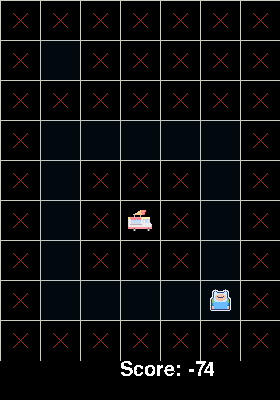

Passed!
--------------------------------------------------------------------------------


In [49]:
from tests import q7
q7.test_5(ExactInference, draw=True)


<div dir="rtl">
۴ تست اول، مربوط به تابع
<code>observe_update</code>
و ۴ تای بعدی مربوط به
<code>elapse_time</code>
هستند. همچنین اجرای کامل تست آخر مقداری طول خواهد کشید.
</div>

In [51]:
from tests import q7

q7.test_1(ExactInference)
q7.test_2(ExactInference)
q7.test_3(ExactInference)
q7.test_4(ExactInference)
q7.test_5(ExactInference)
q7.test_6(ExactInference)
q7.test_7(ExactInference)
q7.test_8(ExactInference)

test_1: Passed!
--------------------------------------------------------------------------------
test_2: Passed!
--------------------------------------------------------------------------------
test_3: Passed!
--------------------------------------------------------------------------------
test_4: Passed!
--------------------------------------------------------------------------------
test_5: Passed!
--------------------------------------------------------------------------------
test_6: Passed!
--------------------------------------------------------------------------------
test_7: Passed!
--------------------------------------------------------------------------------
test_8: Passed!
--------------------------------------------------------------------------------


# **بخش هشتم: Greedy Agent**


<div dir="rtl">
در این بخش، با استفاده از احتمالاتی که در بخش قبل به دست آوردیم، یک ایجنت حریصانه خواهیم ساخت.
<br>
در کلاس زیر، تابع
<code>choose_action</code>
را پیاده کنید. شما باید در این تابع، به ازای هر نفر که بستنی نخورده است (در موقعیت خانه نیست) موقعیتی که احتمال وجود شخص در آن بیشترین است را به دست آورید. سپس حرکتی را انتخاب کنید که به نزدیک‌ترین شخص، نزدیک‌تر شوید.
<br>
از آنجایی که نقشه می‌تواند دیوار داشته باشد، شما باید برای به دست آوردن فاصله دو نقطه در صفحه از
<code>self.distancer.get_distance(pos1, pos2)</code>
استفاده کنید.
</div>

In [88]:
import numpy as np

class GreedyCarAgent(Agent):
    """An agent that charges the closest person."""

    def __init__(
            self,
            index,
            inference_class=ExactInference,
            person_agents=None,
            observe_enable=True,
            elapse_time_enable=True
    ):
        super().__init__(index)
        self.inferences = [inference_class(agent) for agent in person_agents]
        self.observe_enable = observe_enable
        self.elapse_time_enable = elapse_time_enable
        self.distancer = None
        self.first_move = True

    def registerInitialState(self, game_state: GameState):
        """Pre-computes the distance between every two points."""
        for inference in self.inferences:
            inference.initialize(game_state)
        self.distancer = Distancer(game_state.layout)

    def get_action(self, game_state: GameState):
        """Updates beliefs, then chooses an action based on updated beliefs."""
        for index, inf in enumerate(self.inferences):
            if not self.first_move and self.elapse_time_enable:
                inf.elapse_time(game_state)
            self.first_move = False
            if self.observe_enable:
                inf.observe(game_state)
        return self.choose_action(game_state)


    def argmaxx(self, distribution):
      maxVal = -10000
      best = ()
      for dist in distribution:
        if distribution[dist] > maxVal:
          maxVal = distribution[dist]
          best = dist
      return best

    def choose_action(self, game_state: GameState):
        """
        First computes the most likely position of each person that has
        not yet been captured, then chooses an action that brings
        the car closest to the closest person (according to mazeDistance!).

        Hint: Use the following variables in your code.
        """
        car_position = game_state.get_car_position()
        legal_actions = [a for a in game_state.get_legal_actions(0)]
        not_eaten_people = game_state.get_not_eaten_people()
        not_eaten_people_position_distribution = [inference.get_belief_distribution() for i, inference in
                                                  enumerate(self.inferences)
                                                  if not_eaten_people[inference.index - 1]]
        # "*** YOUR CODE HERE ***"
        min_distance = float('inf')
        best_action = None
        for distribution in not_eaten_people_position_distribution:
          most_likely_position = self.argmaxx(distribution)
          for action in legal_actions:
            new_position = Actions.get_successor(car_position, action)
            if self.distancer.get_distance(most_likely_position, new_position) < min_distance:
              min_distance = self.distancer.get_distance(most_likely_position, new_position)
              best_action = action
        return best_action
            
        # "*** END YOUR CODE HERE ***"

# تست‌های بخش هشتم

در این قسمت‌ هم مانند قسمت قبل پارامتر گرافیکی را داریم.
فقط دقت کنید به سلول پایینی که تمامی تست‌ها را اجرا می‌کند این پارامتر را اضافه نکنید.

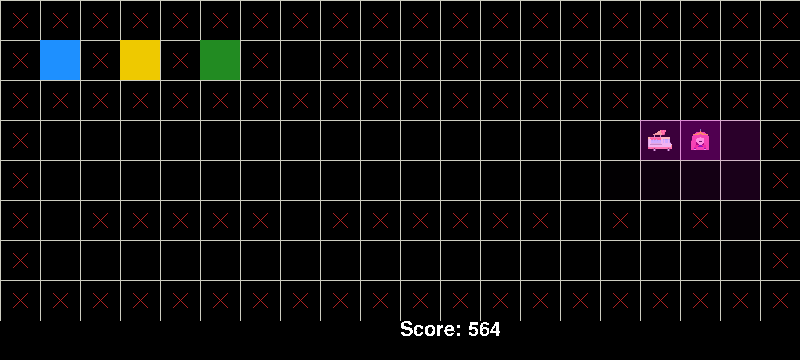

Passed!
--------------------------------------------------------------------------------


In [89]:
from tests import q8

q8.test_1(GreedyCarAgent, ExactInference, draw=True)

In [90]:
q8.test_1(GreedyCarAgent, ExactInference)

test_1: Passed!
--------------------------------------------------------------------------------


# **بخش نهم: Particle Filter**


<div dir="rtl">
آز آنجایی که شهر اووو جادویی است و هر روز یک بخش جدید به مسئله ماشین خودران وارد خواهد شد، لازم است راه‌حلی ارائه دهیم که در فضای بزرگ هم درست کار کند.
<br>
در این بخش شما الگوریتم
<code>Particle Filter</code>
را پیاده خواهید کرد تا احتمال حضور هر شخص در هر خانه را به صورت تقریبی محاسبه کنید.
<br>
در کلاس زیر، توابع را با توجه به داکیومنت‌های ابتدای توابع کامل کنید.
</div>

In [119]:
from ast import Num
from IPython.utils.sysinfo import num_cpus
state = None
class ParticleFilter(InferenceModule):
    """
    A particle filter for approximately tracking a single person.
    """

    def __init__(self, person_agent, num_particles=5000):
        super().__init__(person_agent)
        self.set_num_particles(num_particles)

    def set_num_particles(self, num_particles):
        self.num_particles = num_particles

    def initialize_uniformly(self, game_state: GameState):
        """
        Initialize a list of particles. Use self.num_particles for the number of
        particles. Use self.legal_positions for the legal board positions where
        a particle could be located. Particles should be evenly (not randomly)
        distributed across positions in order to ensure a uniform prior. Use
        self.particles for the list of particles.
        """
        self.particles = []
        # "*** YOUR CODE HERE ***"

        remainder = self.num_particles % len(self.legal_positions)
        for position in self.legal_positions:
          num = self.num_particles // len(self.legal_positions)
          if remainder > 0:
            num += 1
            remainder -= 1
          for i in range(num):
            self.particles.append(position)
        
        # "*** END YOUR CODE HERE ***"

    def get_belief_distribution(self):
        """
        Return the agent's current belief state, a distribution over person
        locations conditioned on all evidence and time passage. This method
        essentially converts a list of particles into a belief distribution.

        This function should return a normalized distribution.
        """
        # "*** YOUR CODE HERE ***"

        belief_distribution = DiscreteDistribution()
        for particle in self.particles:
            belief_distribution[particle] += 1
        belief_distribution.normalize() 
        return belief_distribution

        # "*** END YOUR CODE HERE ***"

    def observe_update(self, observation: int, game_state: GameState):
        """
        Update beliefs based on the distance observation and car's position.

        The observation is the noisy Manhattan distance to the person you are
        tracking.

        There is one special case that a correct implementation must handle.
        When all particles receive zero weight, the list of particles should
        be reinitialized by calling initializeUniformly. The total method of
        the DiscreteDistribution may be useful.
        """
        # "*** YOUR CODE HERE ***"

        belief_distribution = DiscreteDistribution()
        for particle in self.particles:
            belief_distribution[particle] += self.get_observation_prob(observation, game_state.get_car_position(), particle, self.get_home_position())
        belief_distribution.normalize()

        if belief_distribution.total() == 0:
          self.initialize_uniformly(game_state)
          belief_distribution = self.get_belief_distribution()
        self.particles = [belief_distribution.sample() for i in range(self.num_particles)]

        # "*** END YOUR CODE HERE ***"

    def elapse_time(self, game_state):
        """
        Sample each particle's next state based on its current state and the
        gameState.
        """
        # "*** YOUR CODE HERE ***"

        beliefs_copy = DiscreteDistribution()
        for old_position in self.all_positions:
          new_position_distribution = self.get_position_distribution(game_state, old_position)
          for new_position in self.all_positions:
            beliefs_copy[new_position] += self.beliefs[old_position] * new_position_distribution[new_position]
        self.particles = [beliefs_copy.sample() for i in range(self.num_particles)]


        # "*** END YOUR CODE HERE ***"

# تست‌های بخش نهم

در این قسمت‌ هم مانند قسمت قبل پارامتر گرافیکی را داریم.
فقط دقت کنید به سلول پایینی که تمامی تست‌ها را اجرا می‌کند این پارامتر را اضافه نکنید.

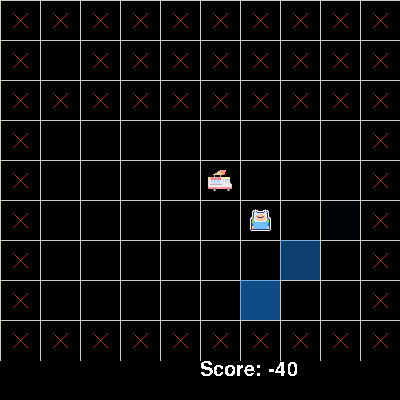

Passed!
--------------------------------------------------------------------------------


In [113]:
from tests import q9
q9.test_7(GreedyCarAgent, ParticleFilter, draw=True)

In [120]:
from tests import q9

q9.test_1(ParticleFilter)
q9.test_2(ParticleFilter)
q9.test_3(ParticleFilter)
q9.test_4(ParticleFilter)
q9.test_5(ParticleFilter)
q9.test_6(ParticleFilter)
q9.test_7(GreedyCarAgent, ParticleFilter)

test_1: Passed!
--------------------------------------------------------------------------------
test_2: Passed!
--------------------------------------------------------------------------------
test_3: Passed!
--------------------------------------------------------------------------------
test_4: Passed!
--------------------------------------------------------------------------------
test_5: Passed!
--------------------------------------------------------------------------------
test_6: Passed!
--------------------------------------------------------------------------------
test_7: Passed!
--------------------------------------------------------------------------------
